## A GENTLE INTRODUCTION TO TORCH.AUTOGRAD

In [2]:
import torch

In [4]:
x = torch.autograd.Variable(torch.ones(4, 5))
y = torch.cos(x)
x_tensor_cos = torch.cos(x.data)
print(x_tensor_cos == torch.cos(x.data))

TypeError: 'module' object is not callable

In [8]:
x = torch.tensor(1.)
a = torch.tensor(1., requires_grad=True)
b = torch.tensor(2., requires_grad=True)
c = torch.tensor(3., requires_grad=True)

y = a**2 * x + b * x + c

print('before:', a.grad, b.grad, c.grad)
grads = torch.autograd.grad(y, [a, b, c])
print('after:', grads[0], grads[1], grads[2])

before: None None None
after: tensor(2.) tensor(1.) tensor(1.)


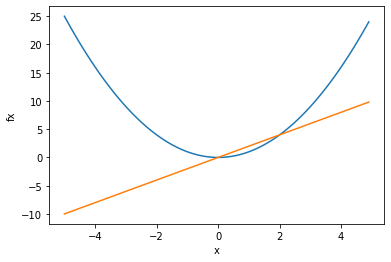

In [9]:
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import Series 
import matplotlib.pyplot as plt

X = np.arange(-5, 5, 0.1)
fX = np.zeros(len(X))
dfX = np.zeros(len(X))

for i, x in enumerate(X):
    x = torch.tensor(x, requires_grad=True)
    fx = x ** 2
    fX[i] = fx
    fx.backward()
    dfX[i] = x.grad

data = {'x': Series(X), 'fx': Series(fX), 'dfx': Series(dfX)}
df = pd.DataFrame(data)

sns.lineplot(data=df, x="x", y="fx")
sns.lineplot(data=df, x="x", y="dfx")
plt.show()

## Computational Graph

In [10]:
import torch
from torchviz import make_dot

tensor(5., grad_fn=<AddBackward0>)


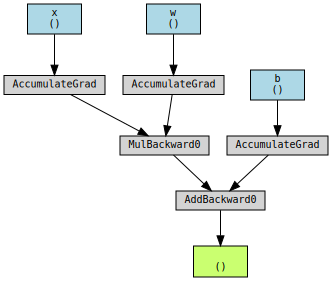

In [11]:
x = torch.tensor(1.0, requires_grad=True)
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)

y = x * w + b  # 計算グラフを構築
print(y)

make_dot(y,params={'x':x,'w':w,'b':b})

tensor(1., grad_fn=<PowBackward0>)


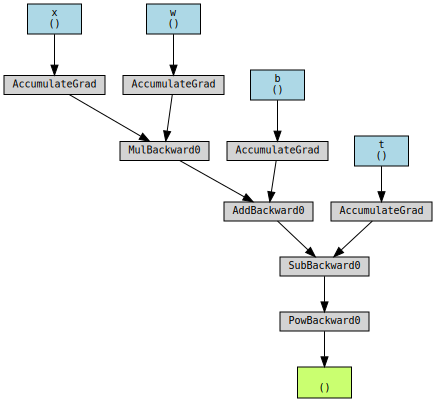

In [12]:
#正解値 t との2乗誤差を計算
t = torch.tensor(4.0, requires_grad=True)
    #tは正解値のつもりなので本来自動微分を計算する必要はないが，requires_grad=Trueにしておかないとグラフに含まれなくなる
error = (y - t)**2
print(error)

# 計算グラフを表示
make_dot(error,params={'x':x,'w':w,'b':b, 't':t})